In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Load the dataset
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# How many rows and columns are there
df.shape

(891, 12)

In [ ]:
# Basic Information about the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# checking the missing values in our dataset
df.isnull().sum(axis=0)

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# divide the dataframes into dependent and independent variables
x= df[["Pclass","Age","Sex","SibSp","Parch","Fare"]]
y= df["Survived"]

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     714 non-null    float64
 2   Sex     891 non-null    object 
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [ ]:
# Handling missing values in the age column
x['Age']=x['Age'].fillna(x['Age'].mean())

/tmp/ipython-input-8-3099569860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Age']=x['Age'].fillna(x['Age'].mean())


In [ ]:
# encoding the sex column
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
x['Sex']=encoder.fit_transform(x['Sex'])

/tmp/ipython-input-9-3369201928.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Sex']=encoder.fit_transform(x['Sex'])


In [ ]:
x.head()

,Pclass,Age,Sex,SibSp,Parch,Fare
0,3,22.0,1,1,0,7.2500
1,1,38.0,0,1,0,71.2833
2,3,26.0,0,0,0,7.9250
3,1,35.0,0,1,0,53.1000
4,3,35.0,1,0,0,8.0500


In [ ]:
# dividing the dataset into training and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
# Dictionary of model for model setup
models={
    'LinearRegression':LinearRegression(),
    'SVC':SVC(),
    'GaussianNB':GaussianNB(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier()
}


Model: LinearRegression
Confusion Matrix:
[[92 14]
 [24 49]]

Summary of all models:
              Model  Accuracy  Precision    Recall  F1_score
0  LinearRegression  0.787709   0.777778  0.671233  0.720588


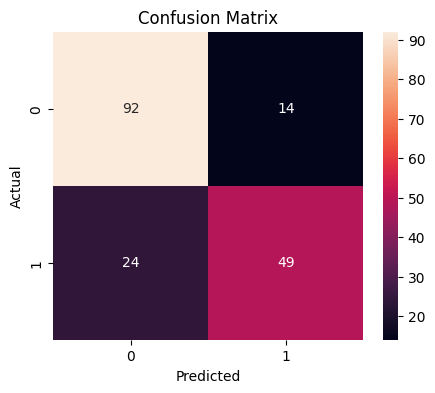

<Figure size 1200x800 with 0 Axes>

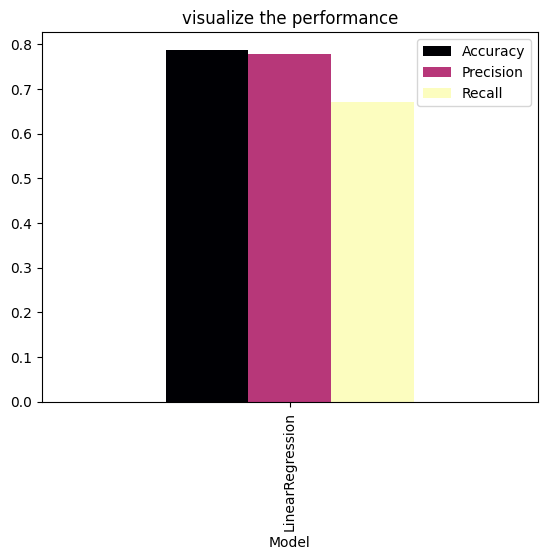


Model: SVC
Confusion Matrix:
[[96 10]
 [52 21]]

Summary of all models:
              Model  Accuracy  Precision    Recall  F1_score
0  LinearRegression  0.787709   0.777778  0.671233  0.720588
1               SVC  0.653631   0.677419  0.287671  0.403846


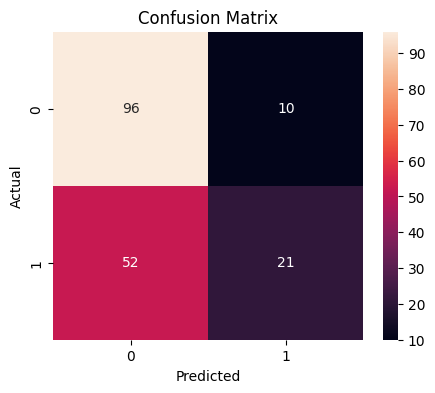

<Figure size 1200x800 with 0 Axes>

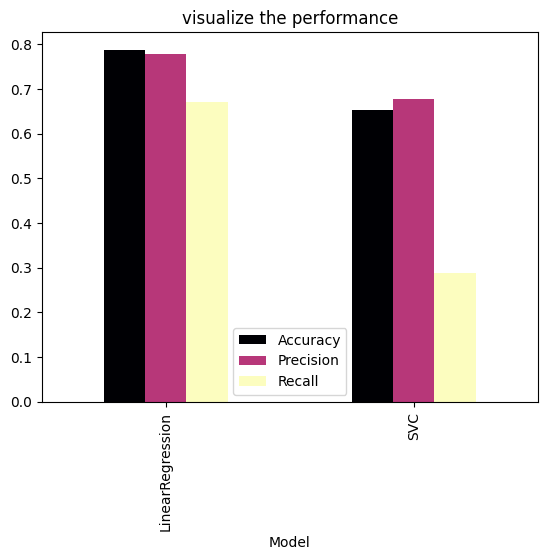


Model: GaussianNB
Confusion Matrix:
[[89 17]
 [26 47]]

Summary of all models:
              Model  Accuracy  Precision    Recall  F1_score
0  LinearRegression  0.787709   0.777778  0.671233  0.720588
1               SVC  0.653631   0.677419  0.287671  0.403846
2        GaussianNB  0.759777   0.734375  0.643836  0.686131


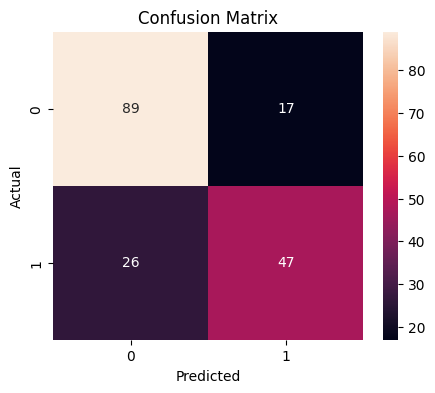

<Figure size 1200x800 with 0 Axes>

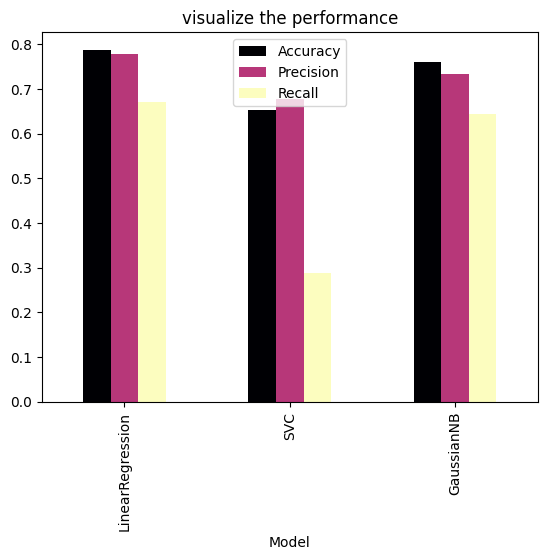


Model: KNeighborsClassifier
Confusion Matrix:
[[88 18]
 [33 40]]

Summary of all models:
                  Model  Accuracy  Precision    Recall  F1_score
0      LinearRegression  0.787709   0.777778  0.671233  0.720588
1                   SVC  0.653631   0.677419  0.287671  0.403846
2            GaussianNB  0.759777   0.734375  0.643836  0.686131
3  KNeighborsClassifier  0.715084   0.689655  0.547945  0.610687


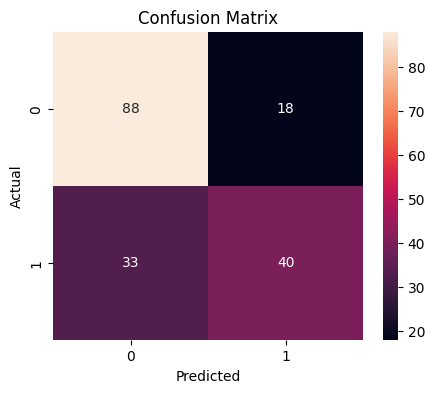

<Figure size 1200x800 with 0 Axes>

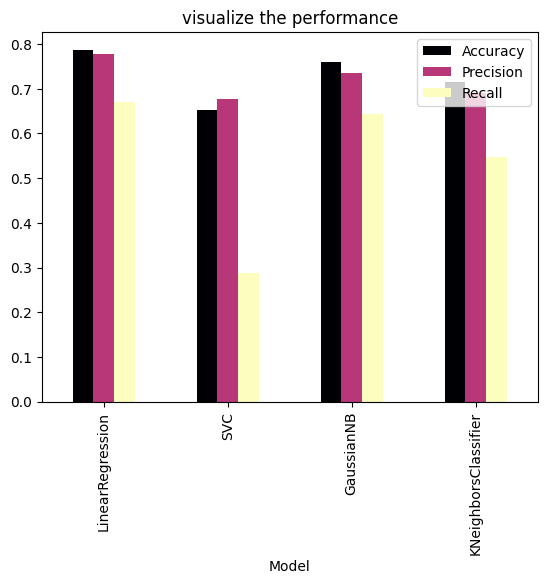


Model: DecisionTreeClassifier
Confusion Matrix:
[[89 17]
 [28 45]]

Summary of all models:
                    Model  Accuracy  Precision    Recall  F1_score
0        LinearRegression  0.787709   0.777778  0.671233  0.720588
1                     SVC  0.653631   0.677419  0.287671  0.403846
2              GaussianNB  0.759777   0.734375  0.643836  0.686131
3    KNeighborsClassifier  0.715084   0.689655  0.547945  0.610687
4  DecisionTreeClassifier  0.748603   0.725806  0.616438  0.666667


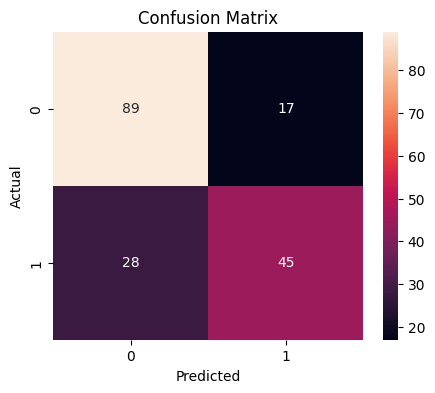

<Figure size 1200x800 with 0 Axes>

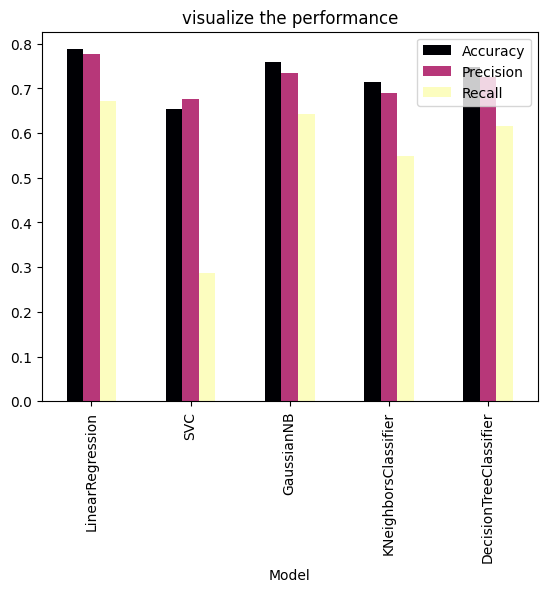


Model: RandomForestClassifier
Confusion Matrix:
[[97  9]
 [31 42]]

Summary of all models:
                    Model  Accuracy  Precision    Recall  F1_score
0        LinearRegression  0.787709   0.777778  0.671233  0.720588
1                     SVC  0.653631   0.677419  0.287671  0.403846
2              GaussianNB  0.759777   0.734375  0.643836  0.686131
3    KNeighborsClassifier  0.715084   0.689655  0.547945  0.610687
4  DecisionTreeClassifier  0.748603   0.725806  0.616438  0.666667
5  RandomForestClassifier  0.776536   0.823529  0.575342  0.677419


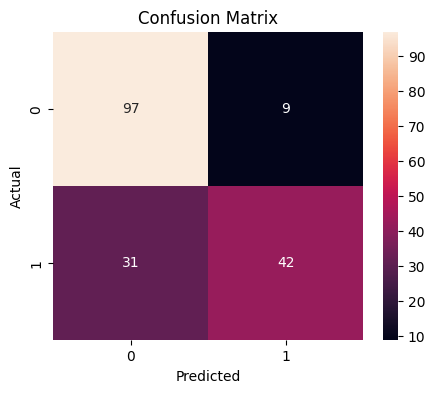

<Figure size 1200x800 with 0 Axes>

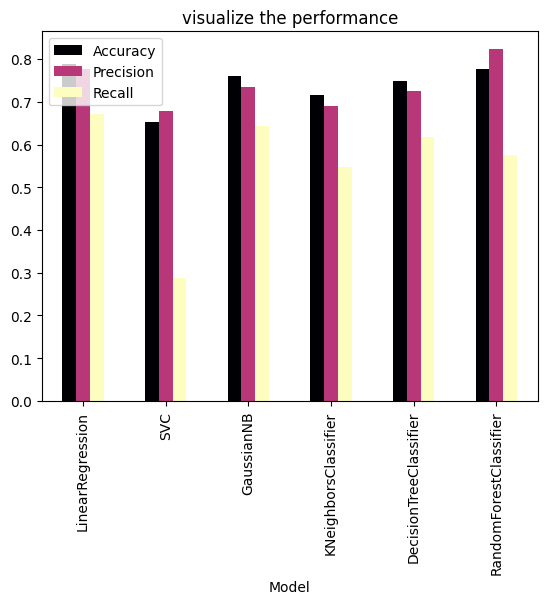

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

results = []

for name, model in models.items():
    model.fit(X_train, y_train) # train the model
    y_raw_pred = model.predict(X_test) # Predict
    if y_raw_pred.ndim == 1 and y_raw_pred.dtype in ['float32', 'float64']:
        y_pred = (y_raw_pred >= 0.5).astype(int)
    elif len(y_raw_pred.shape) > 1 and y_raw_pred.shape[1] == 2:
        y_pred = (y_raw_pred[:, 1] >= 0.5).astype(int)
    else:
        y_pred = y_raw_pred

    cm=confusion_matrix(y_test, y_pred)
    print(f"\nModel: {name}")
    print("Confusion Matrix:")
    print(cm)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1_score": f1
    })

    # Summary Table
    results_df = pd.DataFrame(results)
    print("\nSummary of all models:")
    print(results_df)

    #visualize the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm,annot=True)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # visualize the comparision
    plt.figure(figsize=(12,8))
    results_df.set_index('Model')[["Accuracy","Precision","Recall"]].plot(kind='bar',cmap="magma")
    plt.title("visualize the performance")
    plt.show()

